## Data Analysis

why hi yes hello and welcome to EDA and Corvariance Matrix

Starting of by importing som libraries and looking at the data given

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# load all the data
energy_data = pd.read_csv("data/Energy_Data_20200920_20231027.csv")
dwd_demand = xr.open_dataset("data/dwd_icon_eu_demand_20200920_20231027.nc")
dwd_hornsea = xr.open_dataset("data/dwd_icon_eu_hornsea_1_20200920_20231027.nc")
dwd_pes10 = xr.open_dataset("data/dwd_icon_eu_pes10_20200920_20231027.nc")
ncep_demand = xr.open_dataset("data/ncep_gfs_demand_20200920_20231027.nc")
ncep_hornsea = xr.open_dataset("data/ncep_gfs_hornsea_1_20200920_20231027.nc")
ncep_pes10 = xr.open_dataset("data/ncep_gfs_pes10_20200920_20231027.nc")

# display the data
print("Energy Data:")
display(energy_data)
print("DWD Demand:")
display(dwd_demand)
print("DWD Hornsea:")
display(dwd_hornsea)
print("DWD PES10:")
display(dwd_pes10)
print("NCEP Demand:")
display(ncep_demand)
print("NCEP Hornsea:")
display(ncep_hornsea)
print("NCEP PES10:")
display(ncep_pes10)

Energy Data:


,dtm,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,boa_MWh,DA_Price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2020-09-20T00:00:00Z,20.06,0.0,2108.489754,2206.064656,996.284,2.50,0.0,32.17,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-20T00:30:00Z,19.77,0.0,2108.489754,2206.064656,957.576,15.00,0.0,32.17,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-20T01:00:00Z,28.68,0.0,2108.489754,2206.064656,941.044,47.95,0.0,32.00,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-20T01:30:00Z,28.97,0.0,2108.489754,2206.064656,964.366,29.13,0.0,32.00,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-20T02:00:00Z,28.19,0.0,2108.489754,2206.064656,918.432,28.95,0.0,31.99,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54379,2023-10-27T21:30:00Z,NaN,0.0,2331.383995,2487.180474,275.444,129.00,0.0,82.47,NaN,NaN,NaN,NaN,NaN,NaN
54380,2023-10-27T22:00:00Z,NaN,0.0,2331.383995,2487.180474,132.522,129.00,0.0,64.31,NaN,NaN,NaN,NaN,NaN,NaN
54381,2023-10-27T22:30:00Z,NaN,0.0,2331.383995,2487.180474,64.226,133.00,0.0,64.31,NaN,NaN,NaN,NaN,NaN,NaN
54382,2023-10-27T23:00:00Z,86.84,0.0,2331.383995,2487.180474,28.662,133.00,0.0,58.68,NaN,NaN,NaN,NaN,NaN,NaN


DWD Demand:


<xarray.Dataset> Size: 70MB
Dimensions:             (ref_datetime: 4467, valid_datetime: 93, point: 7)
Coordinates:
    latitude            (point) float64 56B ...
    longitude           (point) float64 56B ...
  * point               (point) int64 56B 0 1 2 3 4 5 6
  * ref_datetime        (ref_datetime) datetime64[ns] 36kB 2020-09-20 ... 202...
  * valid_datetime      (valid_datetime) int64 744B 0 1 2 3 ... 111 114 117 120
Data variables:
    RelativeHumidity    (ref_datetime, valid_datetime, point) float32 12MB ...
    Temperature         (ref_datetime, valid_datetime, point) float32 12MB ...
    TotalPrecipitation  (ref_datetime, valid_datetime, point) float64 23MB ...
    WindDirection       (ref_datetime, valid_datetime, point) float32 12MB ...
    WindSpeed           (ref_datetime, valid_datetime, point) float32 12MB ...

DWD Hornsea:


<xarray.Dataset> Size: 359MB
Dimensions:            (ref_datetime: 4467, valid_datetime: 93, latitude: 6,
                        longitude: 6)
Coordinates:
  * latitude           (latitude) float64 48B 53.77 53.84 53.9 53.97 54.03 54.1
  * longitude          (longitude) float64 48B 1.702 1.767 1.832 ... 1.962 2.027
  * ref_datetime       (ref_datetime) datetime64[ns] 36kB 2020-09-20 ... 2023...
  * valid_datetime     (valid_datetime) int64 744B 0 1 2 3 4 ... 111 114 117 120
Data variables:
    RelativeHumidity   (ref_datetime, valid_datetime, latitude, longitude) float32 60MB ...
    Temperature        (ref_datetime, valid_datetime, latitude, longitude) float32 60MB ...
    WindDirection      (ref_datetime, valid_datetime, latitude, longitude) float32 60MB ...
    WindDirection:100  (ref_datetime, valid_datetime, latitude, longitude) float32 60MB ...
    WindSpeed          (ref_datetime, valid_datetime, latitude, longitude) float32 60MB ...
    WindSpeed:100      (ref_datetime, valid_datetime, latitude, longitude) float32 60MB ...

DWD PES10:


<xarray.Dataset> Size: 133MB
Dimensions:                 (ref_datetime: 4467, valid_datetime: 93, point: 20)
Coordinates:
    latitude                (point) float64 160B ...
    longitude               (point) float64 160B ...
  * point                   (point) int64 160B 0 1 2 3 4 5 ... 14 15 16 17 18 19
  * ref_datetime            (ref_datetime) datetime64[ns] 36kB 2020-09-20 ......
  * valid_datetime          (valid_datetime) int64 744B 0 1 2 3 ... 114 117 120
Data variables:
    CloudCover              (ref_datetime, valid_datetime, point) float32 33MB ...
    SolarDownwardRadiation  (ref_datetime, valid_datetime, point) float64 66MB ...
    Temperature             (ref_datetime, valid_datetime, point) float32 33MB ...

NCEP Demand:


<xarray.Dataset> Size: 132MB
Dimensions:             (ref_datetime: 4527, valid_datetime: 209, point: 7)
Coordinates:
    latitude            (point) float64 56B ...
    longitude           (point) float64 56B ...
  * point               (point) int64 56B 0 1 2 3 4 5 6
  * ref_datetime        (ref_datetime) datetime64[ns] 36kB 2020-09-20 ... 202...
  * valid_datetime      (valid_datetime) int64 2kB 0 1 2 3 4 ... 375 378 381 384
Data variables:
    RelativeHumidity    (ref_datetime, valid_datetime, point) float32 26MB ...
    Temperature         (ref_datetime, valid_datetime, point) float32 26MB ...
    TotalPrecipitation  (ref_datetime, valid_datetime, point) float32 26MB ...
    WindDirection       (ref_datetime, valid_datetime, point) float32 26MB ...
    WindSpeed           (ref_datetime, valid_datetime, point) float32 26MB ...

NCEP Hornsea:


<xarray.Dataset> Size: 204MB
Dimensions:            (ref_datetime: 4526, valid_datetime: 209, latitude: 3,
                        longitude: 3)
Coordinates:
  * latitude           (latitude) float64 24B 53.59 53.84 54.09
  * longitude          (longitude) float64 24B 1.522 1.772 2.022
  * ref_datetime       (ref_datetime) datetime64[ns] 36kB 2020-09-20 ... 2023...
  * valid_datetime     (valid_datetime) int64 2kB 0 1 2 3 4 ... 375 378 381 384
Data variables:
    RelativeHumidity   (ref_datetime, valid_datetime, latitude, longitude) float32 34MB ...
    Temperature        (ref_datetime, valid_datetime, latitude, longitude) float32 34MB ...
    WindDirection      (ref_datetime, valid_datetime, latitude, longitude) float32 34MB ...
    WindDirection:100  (ref_datetime, valid_datetime, latitude, longitude) float32 34MB ...
    WindSpeed          (ref_datetime, valid_datetime, latitude, longitude) float32 34MB ...
    WindSpeed:100      (ref_datetime, valid_datetime, latitude, longitude) float32 34MB ...

NCEP PES10:


<xarray.Dataset> Size: 303MB
Dimensions:                 (ref_datetime: 4526, valid_datetime: 209, point: 20)
Coordinates:
    latitude                (point) float64 160B ...
    longitude               (point) float64 160B ...
  * point                   (point) int64 160B 0 1 2 3 4 5 ... 14 15 16 17 18 19
  * ref_datetime            (ref_datetime) datetime64[ns] 36kB 2020-09-20 ......
  * valid_datetime          (valid_datetime) int64 2kB 0 1 2 3 ... 378 381 384
Data variables:
    CloudCover              (ref_datetime, valid_datetime, point) float32 76MB ...
    SolarDownwardRadiation  (ref_datetime, valid_datetime, point) float64 151MB ...
    Temperature             (ref_datetime, valid_datetime, point) float32 76MB ...

Wow lots of data, merge it all to a single table in a simialr way as in copetiton files

In [26]:
# Extract and take mean from every dataset
dwd_demand_variables = ["RelativeHumidity", "Temperature", "TotalPrecipitation", "WindDirection", "WindSpeed"]
dwd_demand_features = dwd_demand[dwd_demand_variables].mean(dim=["point"]).to_dataframe().reset_index()
dwd_demand_features["ref_datetime"] = dwd_demand_features["ref_datetime"].dt.tz_localize("UTC")
dwd_demand_features["valid_datetime"] = dwd_demand_features["ref_datetime"]  + pd.TimedeltaIndex(dwd_demand_features["valid_datetime"],unit="hours")
dwd_demand_features = dwd_demand_features.rename(columns={
    "RelativeHumidity": "dwd_demand_RelativeHumidity",
    "Temperature": "dwd_demand_Temperature",
    "TotalPrecipitation": "dwd_demand_TotalPrecipitation",
    "WindDirection": "dwd_demand_WindDirection",
    "WindSpeed": "dwd_demand_WindSpeed"
})

dwd_hornsea_variables = ["RelativeHumidity", "Temperature", "WindDirection", "WindDirection:100", "WindSpeed",
                         "WindSpeed:100",]
dwd_hornsea_features = dwd_hornsea[dwd_hornsea_variables].mean(dim=["latitude","longitude"]).to_dataframe().reset_index()
dwd_hornsea_features["ref_datetime"] = dwd_hornsea_features["ref_datetime"].dt.tz_localize("UTC")
dwd_hornsea_features["valid_datetime"] = dwd_hornsea_features["ref_datetime"] + pd.TimedeltaIndex(dwd_hornsea_features["valid_datetime"],unit="hours")
dwd_hornsea_features = dwd_hornsea_features.rename(columns={
    "RelativeHumidity": "dwd_hornsea_RelativeHumidity",
    "Temperature": "dwd_hornsea_Temperature",
    "WindDirection": "dwd_hornsea_WindDirection",
    "WindDirection:100": "dwd_hornsea_WindDirection100",
    "WindSpeed": "dwd_hornsea_WindSpeed",
    "WindSpeed:100": "dwd_hornsea_WindSpeed100"
})

dwd_pes10_variables = ["CloudCover", "SolarDownwardRadiation", "Temperature"]
dwd_pes10_features = dwd_pes10[dwd_pes10_variables].mean(dim=["point"]).to_dataframe().reset_index()
dwd_pes10_features["ref_datetime"] = dwd_pes10_features["ref_datetime"].dt.tz_localize("UTC")
dwd_pes10_features["valid_datetime"] = dwd_pes10_features["ref_datetime"] + pd.TimedeltaIndex(dwd_pes10_features["valid_datetime"],unit="hours")
dwd_pes10_features = dwd_pes10_features.rename(columns={
    "CloudCover": "dwd_pes10_CloudCover",
    "SolarDownwardRadiation": "dwd_pes10_SolarDownwardRadiation",
    "Temperature": "dwd_pes10_Temperature"
})

ncep_demand_variables = ["RelativeHumidity", "Temperature", "TotalPrecipitation", "WindDirection", "WindSpeed"]
ncep_demand_features = ncep_demand[ncep_demand_variables].mean(dim=["point"]).to_dataframe().reset_index()
ncep_demand_features["ref_datetime"] = ncep_demand_features["ref_datetime"].dt.tz_localize("UTC")
ncep_demand_features["valid_datetime"] = ncep_demand_features["ref_datetime"] + pd.TimedeltaIndex(ncep_demand_features["valid_datetime"],unit="hours")
ncep_demand_features = ncep_demand_features.rename(columns={
    "RelativeHumidity": "ncep_demand_RelativeHumidity",
    "Temperature": "ncep_demand_Temperature",
    "TotalPrecipitation": "ncep_demand_TotalPrecipitation",
    "WindDirection": "ncep_demand_WindDirection",
    "WindSpeed": "ncep_demand_WindSpeed"
})

ncep_hornsea_variables = ["RelativeHumidity", "Temperature", "WindDirection", "WindDirection:100", "WindSpeed", "WindSpeed:100"]
ncep_hornsea_features = ncep_hornsea[ncep_hornsea_variables].mean(dim=["latitude","longitude"]).to_dataframe().reset_index()
ncep_hornsea_features["ref_datetime"] = ncep_hornsea_features["ref_datetime"].dt.tz_localize("UTC")
ncep_hornsea_features["valid_datetime"] = ncep_hornsea_features["ref_datetime"] + pd.TimedeltaIndex(ncep_hornsea_features["valid_datetime"],unit="hours")
ncep_hornsea_features = ncep_hornsea_features.rename(columns={
    "RelativeHumidity": "ncep_hornsea_RelativeHumidity",
    "Temperature": "ncep_hornsea_Temperature",
    "WindDirection": "ncep_hornsea_WindDirection",
    "WindDirection:100": "ncep_hornsea_WindDirection100",
    "WindSpeed": "ncep_hornsea_WindSpeed",
    "WindSpeed:100": "ncep_hornsea_WindSpeed100"
})

ncep_pes10_variablies = ["CloudCover", "SolarDownwardRadiation", "Temperature"]
ncep_pes10_features = ncep_pes10[ncep_pes10_variablies].mean(dim=["point"]).to_dataframe().reset_index()
ncep_pes10_features["ref_datetime"] = ncep_pes10_features["ref_datetime"].dt.tz_localize("UTC")
ncep_pes10_features["valid_datetime"] = ncep_pes10_features["ref_datetime"] + pd.TimedeltaIndex(ncep_pes10_features["valid_datetime"],unit="hours")
ncep_pes10_features = ncep_pes10_features.rename(columns={
    "CloudCover": "ncep_pes10_CloudCover",
    "SolarDownwardRadiation": "ncep_pes10_SolarDownwardRadiation",
    "Temperature": "ncep_pes10_Temperature"
})

# Merge data set
modelling_table = dwd_demand_features \
    .merge(dwd_hornsea_features, how="outer",on=["ref_datetime","valid_datetime"]) \
    .merge(dwd_pes10_features, how="outer",on=["ref_datetime","valid_datetime"]) \
    .merge(ncep_demand_features, how="outer",on=["ref_datetime","valid_datetime"]) \
    .merge(ncep_hornsea_features, how="outer",on=["ref_datetime","valid_datetime"]) \
    .merge(ncep_pes10_features, how="outer",on=["ref_datetime","valid_datetime"])

modelling_table = modelling_table.set_index("valid_datetime").groupby("ref_datetime").resample("30T").interpolate("linear")
modelling_table = modelling_table.drop(columns="ref_datetime",axis=1).reset_index()

# calcualte credits and convert dtm to datetime and merdge
energy_data["dtm"] = pd.to_datetime(energy_data["dtm"])
energy_data["Wind_MWh_credit"] = 0.5*energy_data["Wind_MW"] - energy_data["boa_MWh"]
energy_data["Solar_MWh_credit"] = 0.5*energy_data["Solar_MW"]
energy_data["Total_Generation_MWh"] = energy_data["Wind_MWh_credit"]  + energy_data["Solar_MWh_credit"] 

energy_export = energy_data[[
    "dtm",
    "boa_MWh",
    "Solar_MWh_credit",
    "Wind_MWh_credit",
    "Total_Generation_MWh"
    ]]

energy_export = energy_export.copy()
modelling_table = modelling_table.merge(energy_export, how="inner", left_on="valid_datetime", right_on="dtm")

# How much referance time you want to include
modelling_table = modelling_table[modelling_table["valid_datetime"] - modelling_table["ref_datetime"] < np.timedelta64(6,"h")]


# Visulizing the data

Looking for outliers and gaps 

In [ ]:
# I have a suppesion that one date is duplicated in energy data
energy_data["dtm"] = pd.to_datetime(energy_data["dtm"])
dubplicate_counts = energy_data["dtm"].duplicated().sum()
print(dubplicate_counts) # 0, great than something else is of in my calculations

# plot to see if there's any outliers in the processes data


# Look for NaN if non then I assume there's no gaps


0


# Correlation Matirx

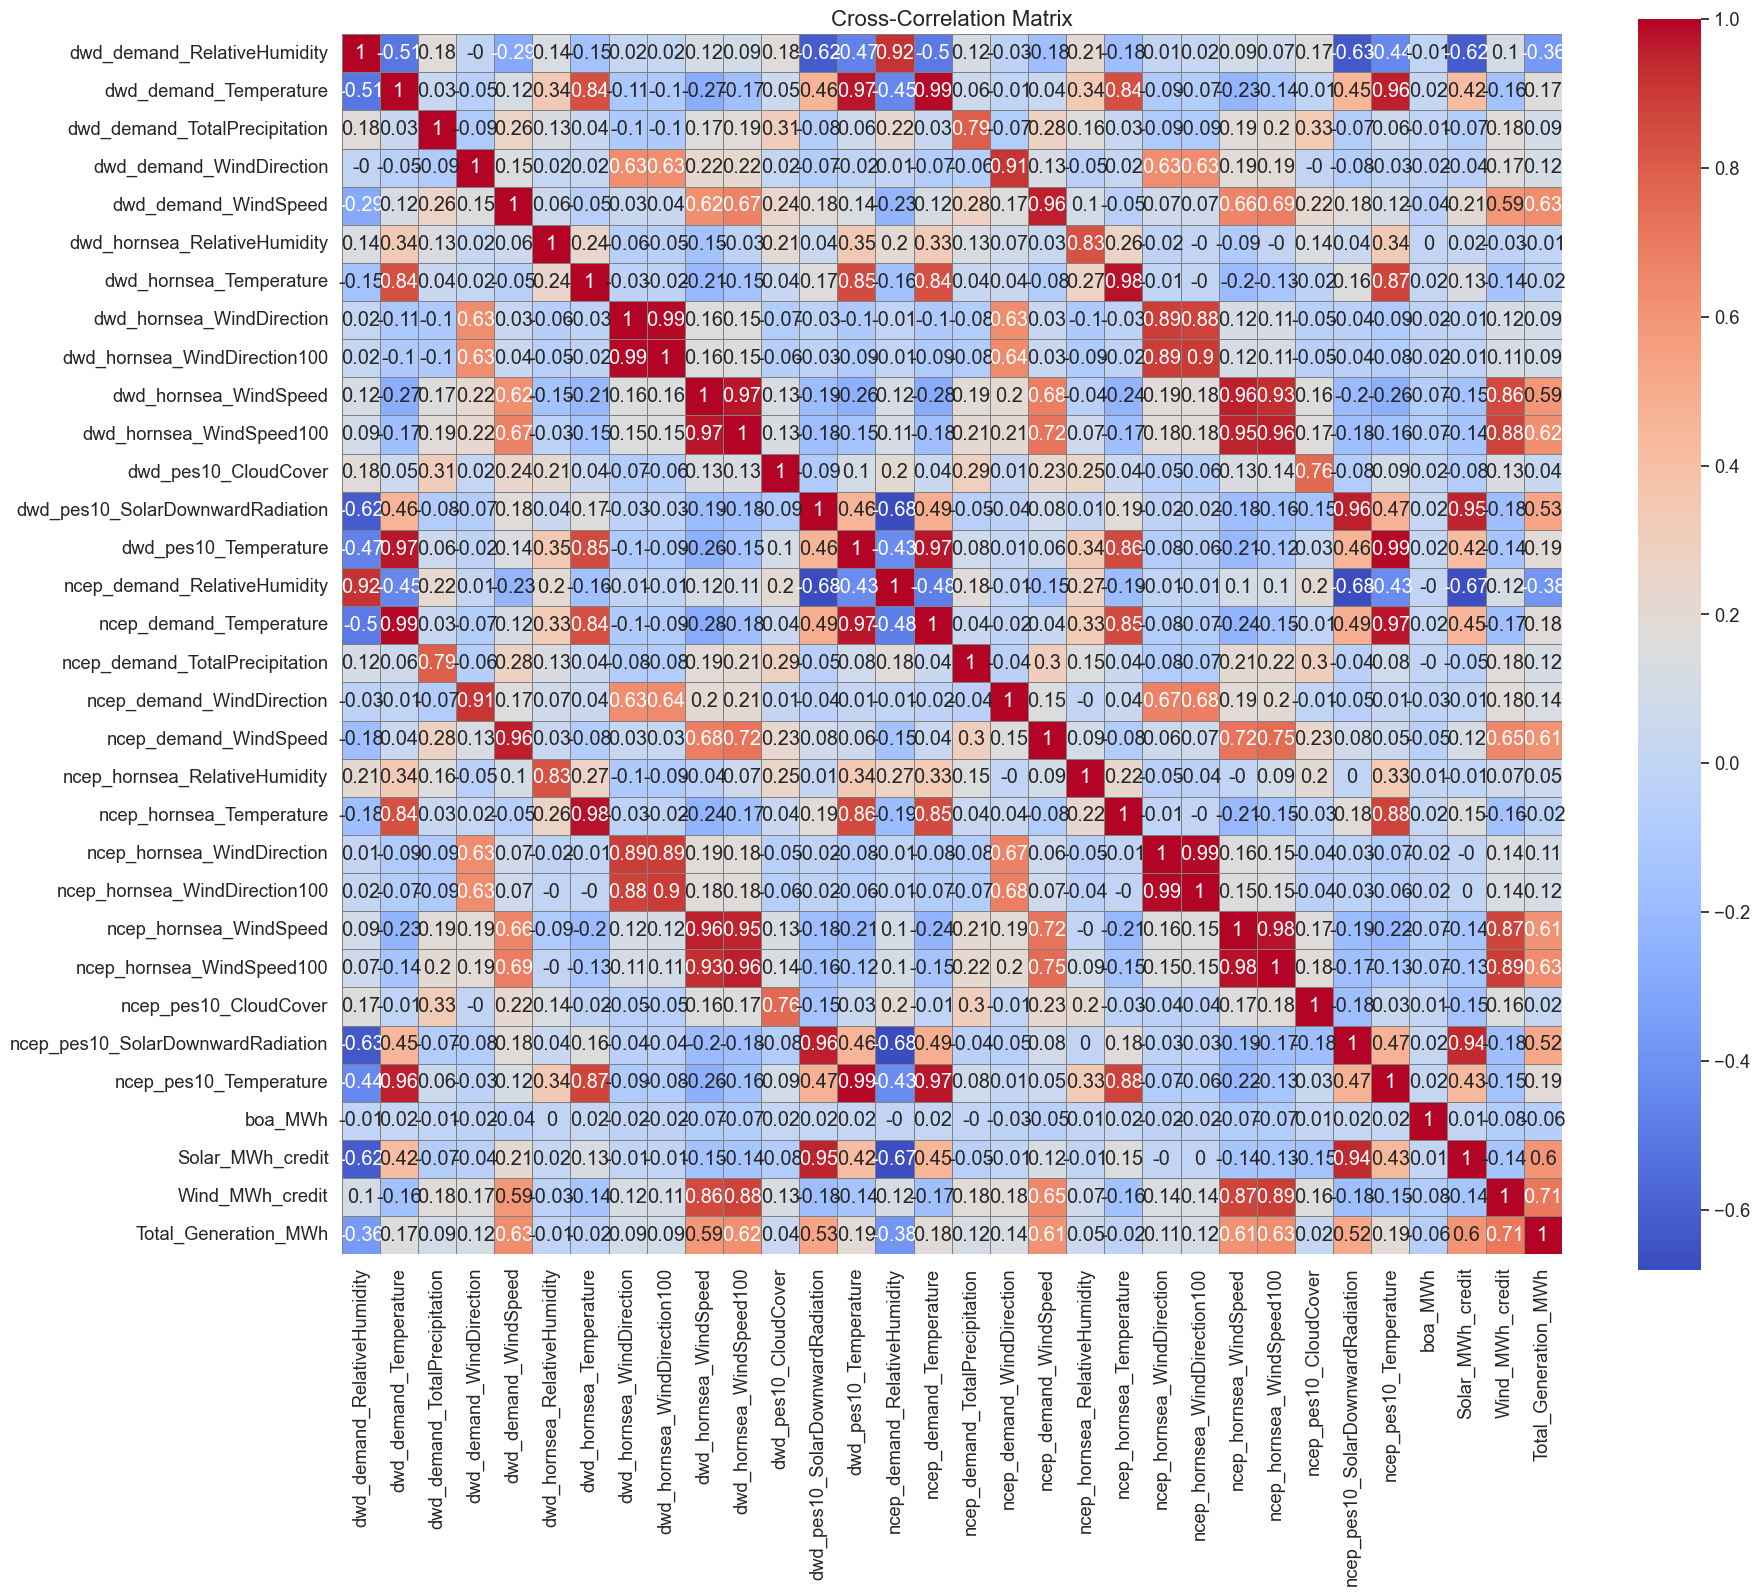

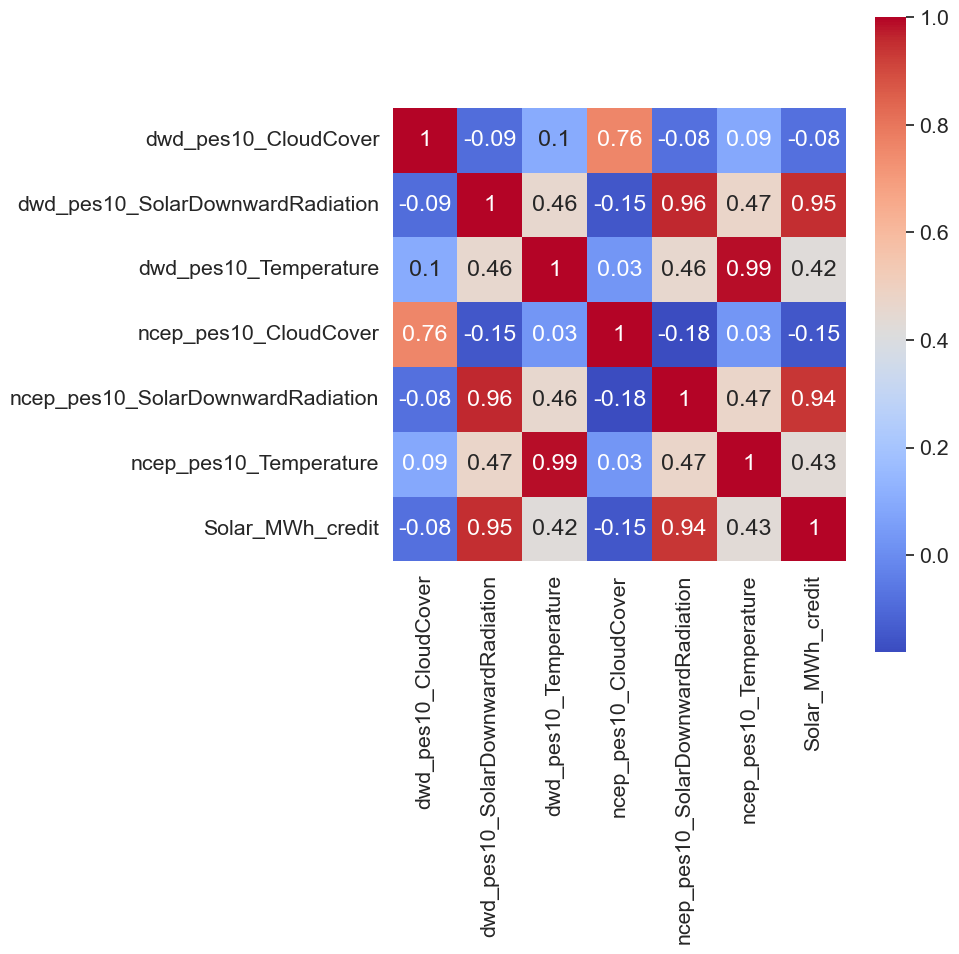

In [35]:
columns_to_exclude = ["valid_datetime", "ref_datetime", "dtm"]
filtered_df = modelling_table.drop(columns=columns_to_exclude)
correlation_matrix = filtered_df.corr().round(2)

plt.figure(figsize=(19, 19))

# HEATmap 🔥🔥🔥
sns.heatmap(correlation_matrix, 
            annot=True,        # Show values
            cmap="coolwarm",    
            square=True, 
            cbar_kws={"shrink": .75}, 
            linewidths=0.5, 
            linecolor='gray')

plt.title("Cross-Correlation Matrix", fontsize=16)
plt.tight_layout()

# Save the figure ???
#plt.savefig("correlation_matrix.eps", format="eps", dpi=300)
#plt.show()

# EVEN MORE REDUCED CROSS CORR
selected_columns_1 = [
    "dwd_pes10_CloudCover", 
    "dwd_pes10_SolarDownwardRadiation",
    "dwd_pes10_Temperature",
    "ncep_pes10_CloudCover", 
    "ncep_pes10_SolarDownwardRadiation",
    "ncep_pes10_Temperature",
    "Solar_MWh_credit"
]

selected_columns_2 = [
    "dwd_hornsea_RelativeHumidity", 
    "dwd_hornsea_WindDirection100", 
    "dwd_hornsea_WindSpeed100",
    "ncep_hornsea_RelativeHumidity", 
    "ncep_hornsea_WindDirection100", 
    "ncep_hornsea_WindSpeed100",
    "Wind_MWh_credit"
]

subset_df = modelling_table[selected_columns_1]

correlation_matrix = subset_df.corr().round(2)

plt.figure(figsize=(10, 10))
sns.set(font_scale = 1.4)
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap="coolwarm", 
            square=True, 
#            linewidths=0.5, 
            linecolor="gray", 
#            cbar_kws={"shrink": 0.75}
            )


plt.tight_layout()
#plt.savefig("Selected_correlation_matrix_sun.eps", format="eps", dpi=300)
plt.show()

# Map Plots

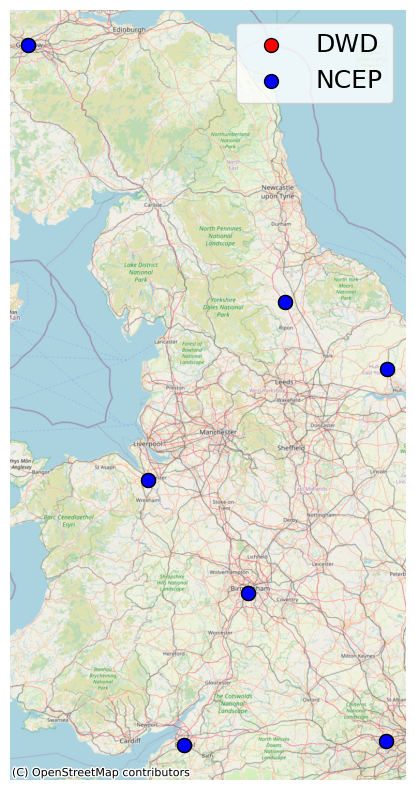

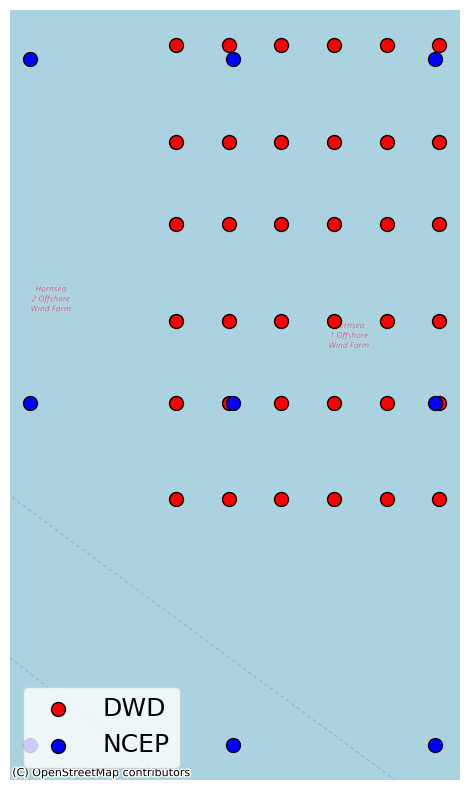

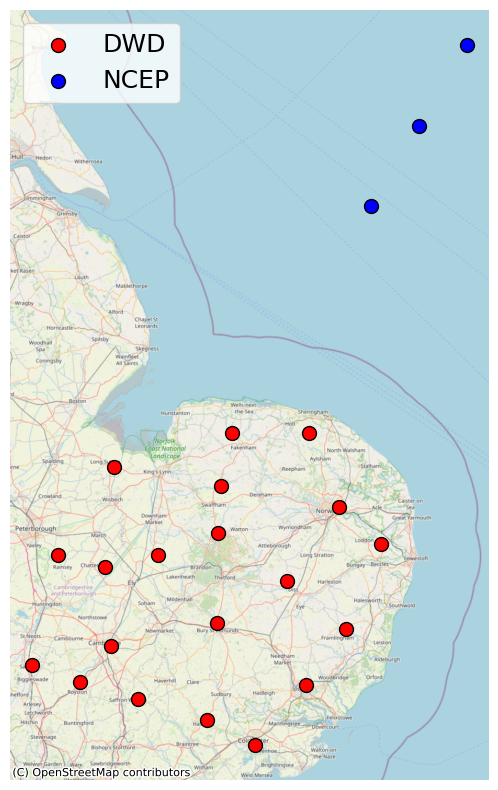

In [29]:
# Import spes lib 
# These are not a part of requirments as only one member needs to do this 
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

def plot_map(dwd_lat, dwd_lon, ncep_lat, ncep_lon, filename):
    df = pd.DataFrame({
        "source": ["DWD"] * len(dwd_lat) + ["NCEP"] * len(ncep_lat),
        "latitude": list(dwd_lat) + list(ncep_lat),
        "longitude": list(dwd_lon) + list(ncep_lon)
    })

    gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df["longitude"], df["latitude"])], crs="EPSG:4326")
    gdf = gdf.to_crs(epsg=3857)  # Project to Web Mercator for basemap

    fig, ax = plt.subplots(figsize=(8, 8))
    gdf[gdf["source"] == "DWD"].plot(ax=ax, color="red", markersize=100, label="DWD", edgecolor="black")
    gdf[gdf["source"] == "NCEP"].plot(ax=ax, color="blue", markersize=100, label="NCEP", edgecolor="black")

    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_axis_off()
    ax.legend(loc="best", fontsize=18, frameon=True)

    plt.tight_layout()
    #plt.savefig(filename, dpi=300) # Save figure ?? 
    plt.show()

# Extract points 
dwd_demand_lat = dwd_demand["latitude"].values
dwd_demand_lon = dwd_demand["longitude"].values

dwd_hornsea_lat = dwd_hornsea["latitude"].values
dwd_hornsea_lon = dwd_hornsea["longitude"].values

dwd_pes10_lat = dwd_pes10["latitude"].values 
dwd_pes10_lon = dwd_pes10["longitude"].values

ncep_demand_lat = ncep_demand["latitude"].values
ncep_demand_lon = ncep_demand["longitude"].values

ncep_hornsea_lat = ncep_hornsea["latitude"].values
ncep_hornsea_lon = ncep_hornsea["longitude"].values

ncep_pes10_lat = ncep_hornsea["latitude"].values
ncep_pes10_lon = ncep_hornsea["longitude"].values

# prep hornsea 
mesh_lat_dwd, mesh_lon_dwd = np.meshgrid(dwd_hornsea_lat, dwd_hornsea_lon)
flat_dwd_lat = mesh_lat_dwd.ravel()
flat_dwd_lon = mesh_lon_dwd.ravel()

mesh_lat_ncep, mesh_lon_ncep = np.meshgrid(ncep_hornsea_lat, ncep_hornsea_lon)
flat_ncep_lat = mesh_lat_ncep.ravel()
flat_ncep_lon = mesh_lon_ncep.ravel()

plot_map(dwd_demand_lat, dwd_demand_lon, ncep_demand_lat, ncep_demand_lon,
        filename="map_demand.png")

plot_map(flat_dwd_lat, flat_dwd_lon, flat_ncep_lat, flat_ncep_lon,
         filename="hornsea_grid_map.png")

plot_map(dwd_pes10_lat, dwd_pes10_lon, ncep_pes10_lat, ncep_pes10_lon,
         filename="map_pes10.png")
